In [1]:
from environments.PlantGrowthChamber.OfflinePlantGrowthChamber import OfflinePlantGrowthChamber, OfflinePlantGrowthChamber_1hrStep, OfflinePlantGrowthChamber_1hrStep_MC, OfflinePlantGrowthChamber_1hrStep_MC_AreaOnly, OfflinePlantGrowthChamber_1hrStep_MC_TimeOnly
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paths = [#"/home/lolanff/plant-rl/data/online/E7/P3/ESARSA3/z3",
         #"/home/lolanff/plant-rl/data/online/E7/P4/LinearESARSA6/z6",
         #"/home/lolanff/plant-rl/data/online/E7/P4/LinearESARSA8/z8",
         #"/home/lolanff/plant-rl/data/online/E7/P4/LinearESARSA9/z9",
         "/home/lolanff/plant-rl/data/online/E7/P2/Constant2/z2", 
         #"/home/lolanff/plant-rl/data/online/E7/P2/Constant1/z1"
        ]

#env = OfflinePlantGrowthChamber_1hrStep_MC_AreaOnly(dataset_paths=paths)
#env = OfflinePlantGrowthChamber_1hrStep_MC_TimeOnly(dataset_paths=paths)
env = OfflinePlantGrowthChamber(dataset_paths=paths)

In [3]:
num_bins = 12
R0 = {i: [] for i in range(num_bins)}    # lists of rewards assigned to (s,a)=(i,0)
R1 = {i: [] for i in range(num_bins)}    # lists of rewards assigned to (s,a)=(i,1)
Reward = []
State = []

s, env_info = env.start()
current_state = int(s[0] * num_bins)
current_action = env_info['action']
data_exhausted = False
while not data_exhausted:
    (reward, s, term, env_info) = env.step(None)
    if current_action == 0: 
        R0[current_state].append(reward)
    elif current_action == 1: 
        R1[current_state].append(reward)
    Reward.append(reward)
    State.append(s)

    data_exhausted = env_info.get("exhausted", False)
    if term:
        if not data_exhausted:
            s, env_info = env.start()
            current_state = int(s[0] * num_bins)  
            current_action = env_info['action']
    else: 
        current_state = int(s[0] * num_bins)
        current_action = env_info['action']

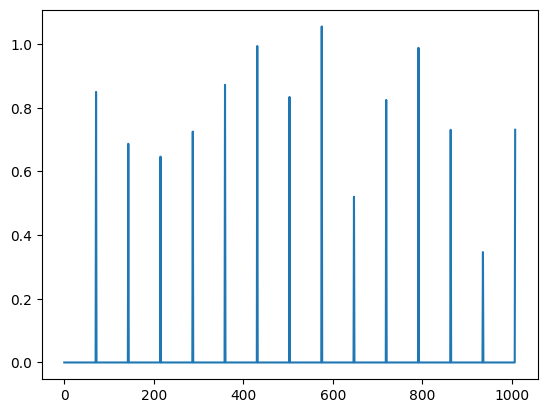

In [4]:
plt.plot(Reward)

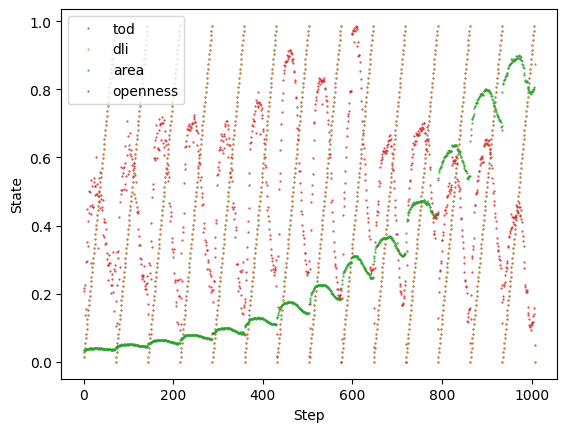

In [5]:
fig, ax = plt.subplots(1, 1)
State = np.array(State)
ax.plot(State, '.', markersize=1, label=['tod', 'dli', 'area', 'openness'])
ax.set_ylabel('State')
ax.set_xlabel('Step')
ax.legend()

/home/lolanff/ENV/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lolanff/ENV/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


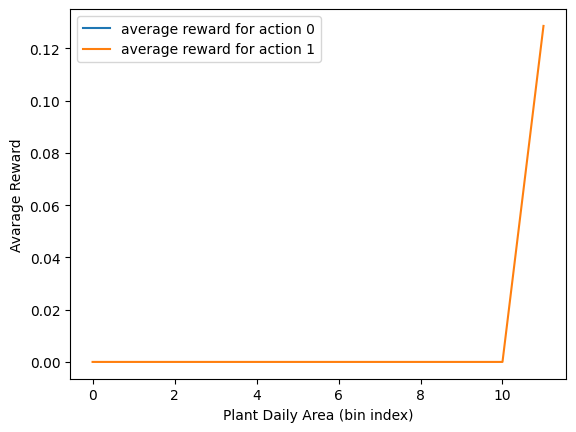

In [6]:
ave_R0 = np.array([np.mean(R0[i]) for i in range(num_bins)])
ave_R1 = np.array([np.mean(R1[i]) for i in range(num_bins)])
plt.plot(ave_R0, label='average reward for action 0')
plt.plot(ave_R1, label='average reward for action 1')
plt.xlabel('Plant Daily Area (bin index)')
plt.ylabel('Avarage Reward')
plt.legend()

/home/lolanff/ENV/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


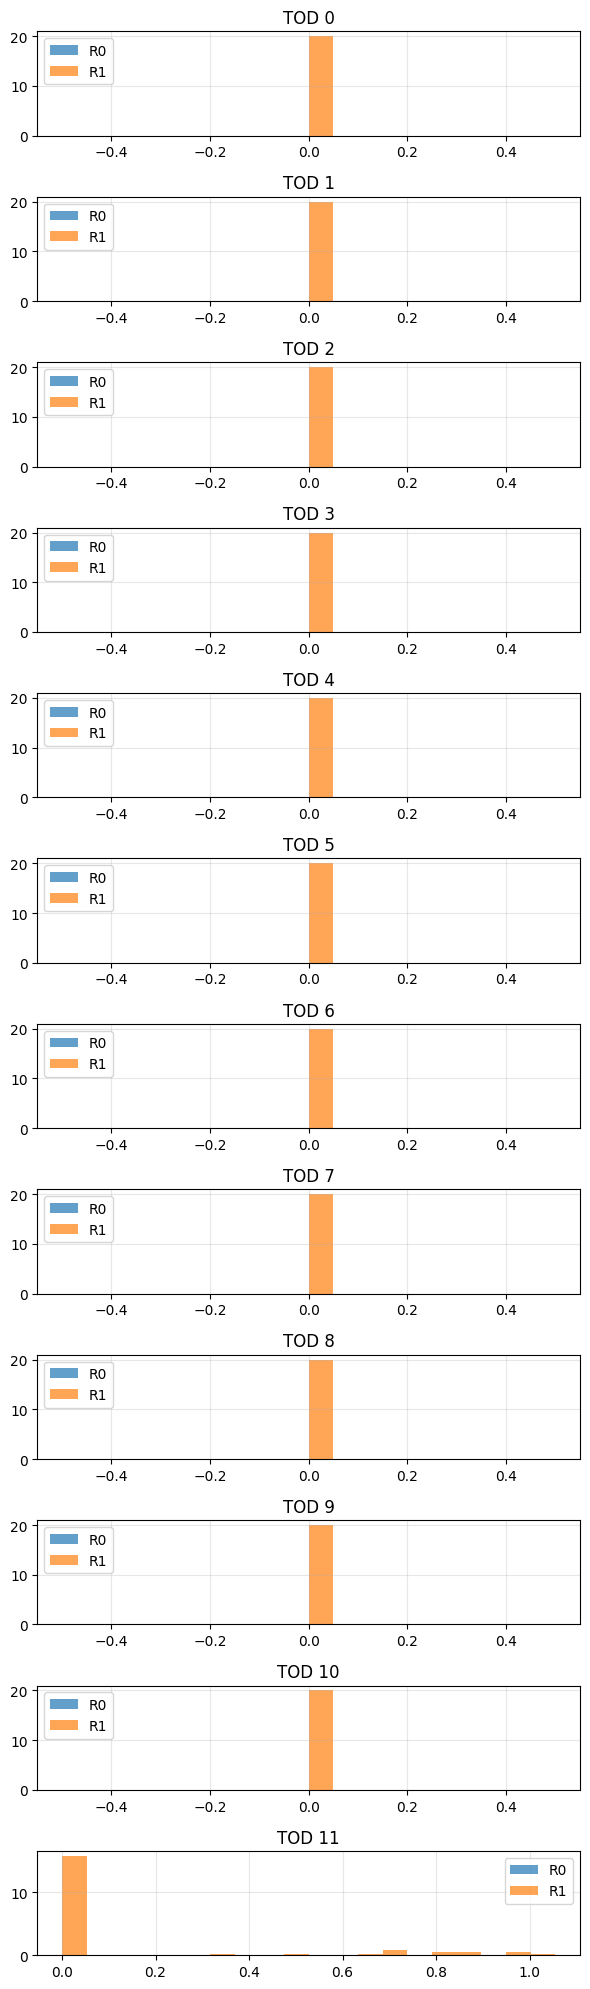

In [7]:
fig, axes = plt.subplots(12, 1, figsize=(6, 20))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot histograms for each bin
for i in range(num_bins):
    axes[i].hist(R0[i], alpha=0.7, label='R0', bins=20, density=True)
    axes[i].hist(R1[i], alpha=0.7, label='R1', bins=20, density=True)
    axes[i].set_title(f'TOD {i}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()